# Importação de bibliotecas

In [2]:
from src.estrategias.programacao_dinamica.lee_bypass import *
import timeit
import warnings
warnings.filterwarnings('ignore')
import os
import sys
from src.estrategias.genetic.genetic_task import *
from src.estrategias.forca_bruta.brute_force_branch_no_bound import *
from src.estrategias.branchbound.branchbound import *
import pandas as pd

import numpy as np, scipy.stats as st



In [3]:
class AvaliacaoAlgoritmo:
    """
    Classe para registrar o resultado das execuções de um algoritmo
    """

    def __init__(self,quantidade_repeticoes,lista_parametros):
        self.quantidade_repeticoes = quantidade_repeticoes
        self.lista_parametros = lista_parametros
    def retorna_resultados(self,funcao,nome_algoritmo):
        data=[]
        for parametro in self.lista_parametros:
            for i in range(self.quantidade_repeticoes):
                f = open(os.devnull, 'w')
                antigo = sys.stdout
                sys.stdout = f
                starttime = timeit.default_timer()
                funcao(*parametro)
                interval =  timeit.default_timer() - starttime
                sys.stdout = antigo
                data.append([nome_algoritmo,parametro,interval])
        retorno = pd.DataFrame(data=data,columns=['algoritmo','parametro','tempo'])
        return retorno
def gera_parametro(qnt_amostras,tam_palavra=0):
    """
    Função para gerar parâmetros de forma ao problema de s2s correction ser np completo
    :parameter qnt_amostras: quantidade de amostras a serem retornadas
    :return:
    """
    dados_np_completos = pd.read_csv('npcompleto.csv',sep=',')
    if tam_palavra>0:
        dados_np_completos=dados_np_completos[dados_np_completos.origem.apply(lambda x: len(str(x))<=tam_palavra)]
    if qnt_amostras > 0:
        amostra = dados_np_completos.sample(qnt_amostras)
    else:
        amostra = dados_np_completos

    amostra = dados_np_completos.sample(qnt_amostras)
    retorno = [(observacao.origem,observacao.destino) for observacao in amostra.itertuples()]
    return retorno





# Descrição do problema

# Abordagem Força Bruta

In [4]:
amostra = gera_parametro(1,4)
amostra

[('Elon', 'no')]

In [5]:
avaliacao = AvaliacaoAlgoritmo(30,amostra)
df_forca_bruta = avaliacao.retorna_resultados(roda_brute,'Força Bruta')

In [6]:
df_forca_bruta.head()

,algoritmo,parametro,tempo
0,Força Bruta,"(Elon, no)",48.966925
1,Força Bruta,"(Elon, no)",45.326385
2,Força Bruta,"(Elon, no)",70.819438
3,Força Bruta,"(Elon, no)",49.525538
4,Força Bruta,"(Elon, no)",42.138886


<AxesSubplot:>

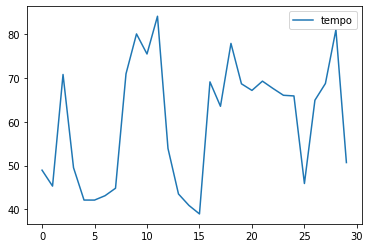

In [7]:
df_forca_bruta[['tempo']].plot()

In [8]:
df_forca_bruta.to_csv('resultados_forca_bruta.csv')

#### Intervalo de confiança para a média de tempo do algoritmo de força bruta

In [9]:
st.t.interval(0.95, len(df_forca_bruta['tempo'])-1, loc=np.mean(df_forca_bruta['tempo']), scale=st.sem(df_forca_bruta['tempo']))


(54.789591136830154, 65.3206120565032)

# Abordagem Branch and Bound

In [10]:
df_branch = avaliacao.retorna_resultados(roda_branch,'Branch and Bound')

In [11]:
df_branch.head()

,algoritmo,parametro,tempo
0,Branch and Bound,"(Elon, no)",0.140239
1,Branch and Bound,"(Elon, no)",0.124263
2,Branch and Bound,"(Elon, no)",0.138320
3,Branch and Bound,"(Elon, no)",0.145707
4,Branch and Bound,"(Elon, no)",0.088253


<AxesSubplot:>

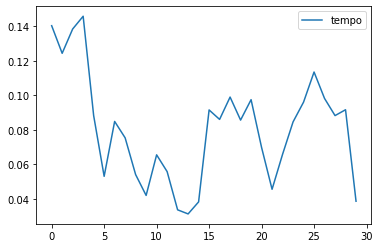

In [12]:
df_branch[['tempo']].plot()

In [13]:
df_branch.to_csv('resultados_brach_and_bound.csv')

#### Intervalo de confiança para a média de tempo do algoritmo branch and bound

In [14]:
st.t.interval(0.95, len(df_branch['tempo'])-1, loc=np.mean(df_branch['tempo']), scale=st.sem(df_branch['tempo']))

(0.06888347244137016, 0.09260878755866772)

# Abordagem de algoritmos de programação dinâmica

In [15]:
lee_algoritmo= LeeAlgorithm(20)

In [16]:
df_programacao_dinamica = avaliacao.retorna_resultados(lee_algoritmo.roda_lee,'Programação dinâmica')

In [17]:
df_programacao_dinamica.head()

,algoritmo,parametro,tempo
0,Programação dinâmica,"(Elon, no)",0.000086
1,Programação dinâmica,"(Elon, no)",0.000130
2,Programação dinâmica,"(Elon, no)",0.000192
3,Programação dinâmica,"(Elon, no)",0.000183
4,Programação dinâmica,"(Elon, no)",0.000073


<AxesSubplot:>

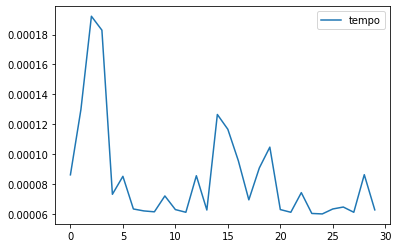

In [18]:
df_programacao_dinamica[['tempo']].plot()

In [19]:
df_programacao_dinamica.to_csv('resultados_genetic.csv')

#### Intervalo de confiança para a média de tempo do algoritmo de programação dinâmica

In [27]:
st.t.interval(0.95, len(df_programacao_dinamica['tempo'])-1, loc=np.mean(df_programacao_dinamica['tempo']), scale=st.sem(df_programacao_dinamica['tempo']))

(7.199826744296984e-05, 9.766839922733965e-05)

# Abordagem de algoritmos genéticos (Metaheurística)

In [21]:
df_genetic = avaliacao.retorna_resultados(roda_genetic,'Genetic Algorithm')

In [22]:
df_genetic.head()

,algoritmo,parametro,tempo
0,Genetic Algorithm,"(Elon, no)",0.084701
1,Genetic Algorithm,"(Elon, no)",0.080289
2,Genetic Algorithm,"(Elon, no)",0.064281
3,Genetic Algorithm,"(Elon, no)",0.032223
4,Genetic Algorithm,"(Elon, no)",0.035024


<AxesSubplot:>

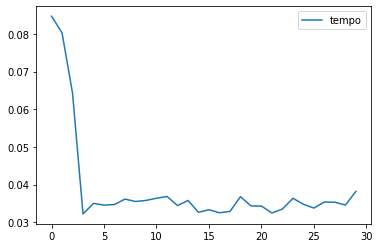

In [23]:
df_genetic[['tempo']].plot()

In [24]:
df_genetic.to_csv('resultados_genetic.csv')

#### Intervalo de confiança para a média de tempo do algoritmo genético

In [25]:
st.t.interval(0.95, len(df_genetic['tempo'])-1, loc=np.mean(df_genetic['tempo']), scale=st.sem(df_genetic['tempo']))

(0.03404283055422261, 0.04382596277910805)